In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../기상청공모전/data/derivate_data.csv")
df.head()

,Unnamed: 0,anchor_drag,num,latitude,longitude,sog,cog,hdg,d_lati,d_long,d_d_lati,d_d_long
0,2,0,1001,35.461472,129.439878,0.4,9.6,273.0,0.000312,0.000333,0.000342,0.000342
1,3,0,1001,35.461688,129.439792,0.2,328.0,267.0,0.000216,-0.000086,-0.000096,-0.000096
2,4,0,1001,35.461708,129.439733,0.2,260.1,265.0,0.000020,-0.000059,-0.000196,-0.000196
3,5,0,1001,35.461720,129.439708,0.1,262.8,270.0,0.000012,-0.000025,-0.000008,-0.000008
4,6,0,1001,35.461733,129.439717,0.3,277.6,273.0,0.000013,0.000009,0.000001,0.000001


In [3]:
df = df.iloc[:, 1:]

In [4]:
df

,anchor_drag,num,latitude,longitude,sog,cog,hdg,d_lati,d_long,d_d_lati,d_d_long
0,0,1001,35.461472,129.439878,0.4,9.6,273.0,0.000312,0.000333,0.000342,0.000342
1,0,1001,35.461688,129.439792,0.2,328.0,267.0,0.000216,-0.000086,-0.000096,-0.000096
2,0,1001,35.461708,129.439733,0.2,260.1,265.0,0.000020,-0.000059,-0.000196,-0.000196
3,0,1001,35.461720,129.439708,0.1,262.8,270.0,0.000012,-0.000025,-0.000008,-0.000008
4,0,1001,35.461733,129.439717,0.3,277.6,273.0,0.000013,0.000009,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...
681435,1,4087,35.053083,129.061333,1.3,26.0,97.0,0.000033,0.000016,-0.000017,-0.000017
681436,1,4087,35.053083,129.061333,1.3,29.0,99.0,0.000000,0.000000,-0.000033,-0.000033
681437,1,4087,35.053117,129.061400,1.2,48.0,106.0,0.000034,0.000067,0.000034,0.000034
681438,1,4087,35.053117,129.061417,1.2,52.0,108.0,0.000000,0.000017,-0.000034,-0.000034


In [5]:
num_list = []
temp = df[(df['num']>1000) &(df['num']<=2000)]
num_list.append(min(temp['num'].unique().tolist()))
temp = df[(df['num']>2000) &(df['num']<=3000)]
num_list.append(min(temp['num'].unique().tolist()))
temp = df[(df['num']>3000) &(df['num']<=4000)]
num_list.append(min(temp['num'].unique().tolist()))
temp = df[(df['num']>4000) &(df['num']<=5000)]
num_list.append(min(temp['num'].unique().tolist()))

In [6]:
num_list

[1001, 2001, 3001, 4001]

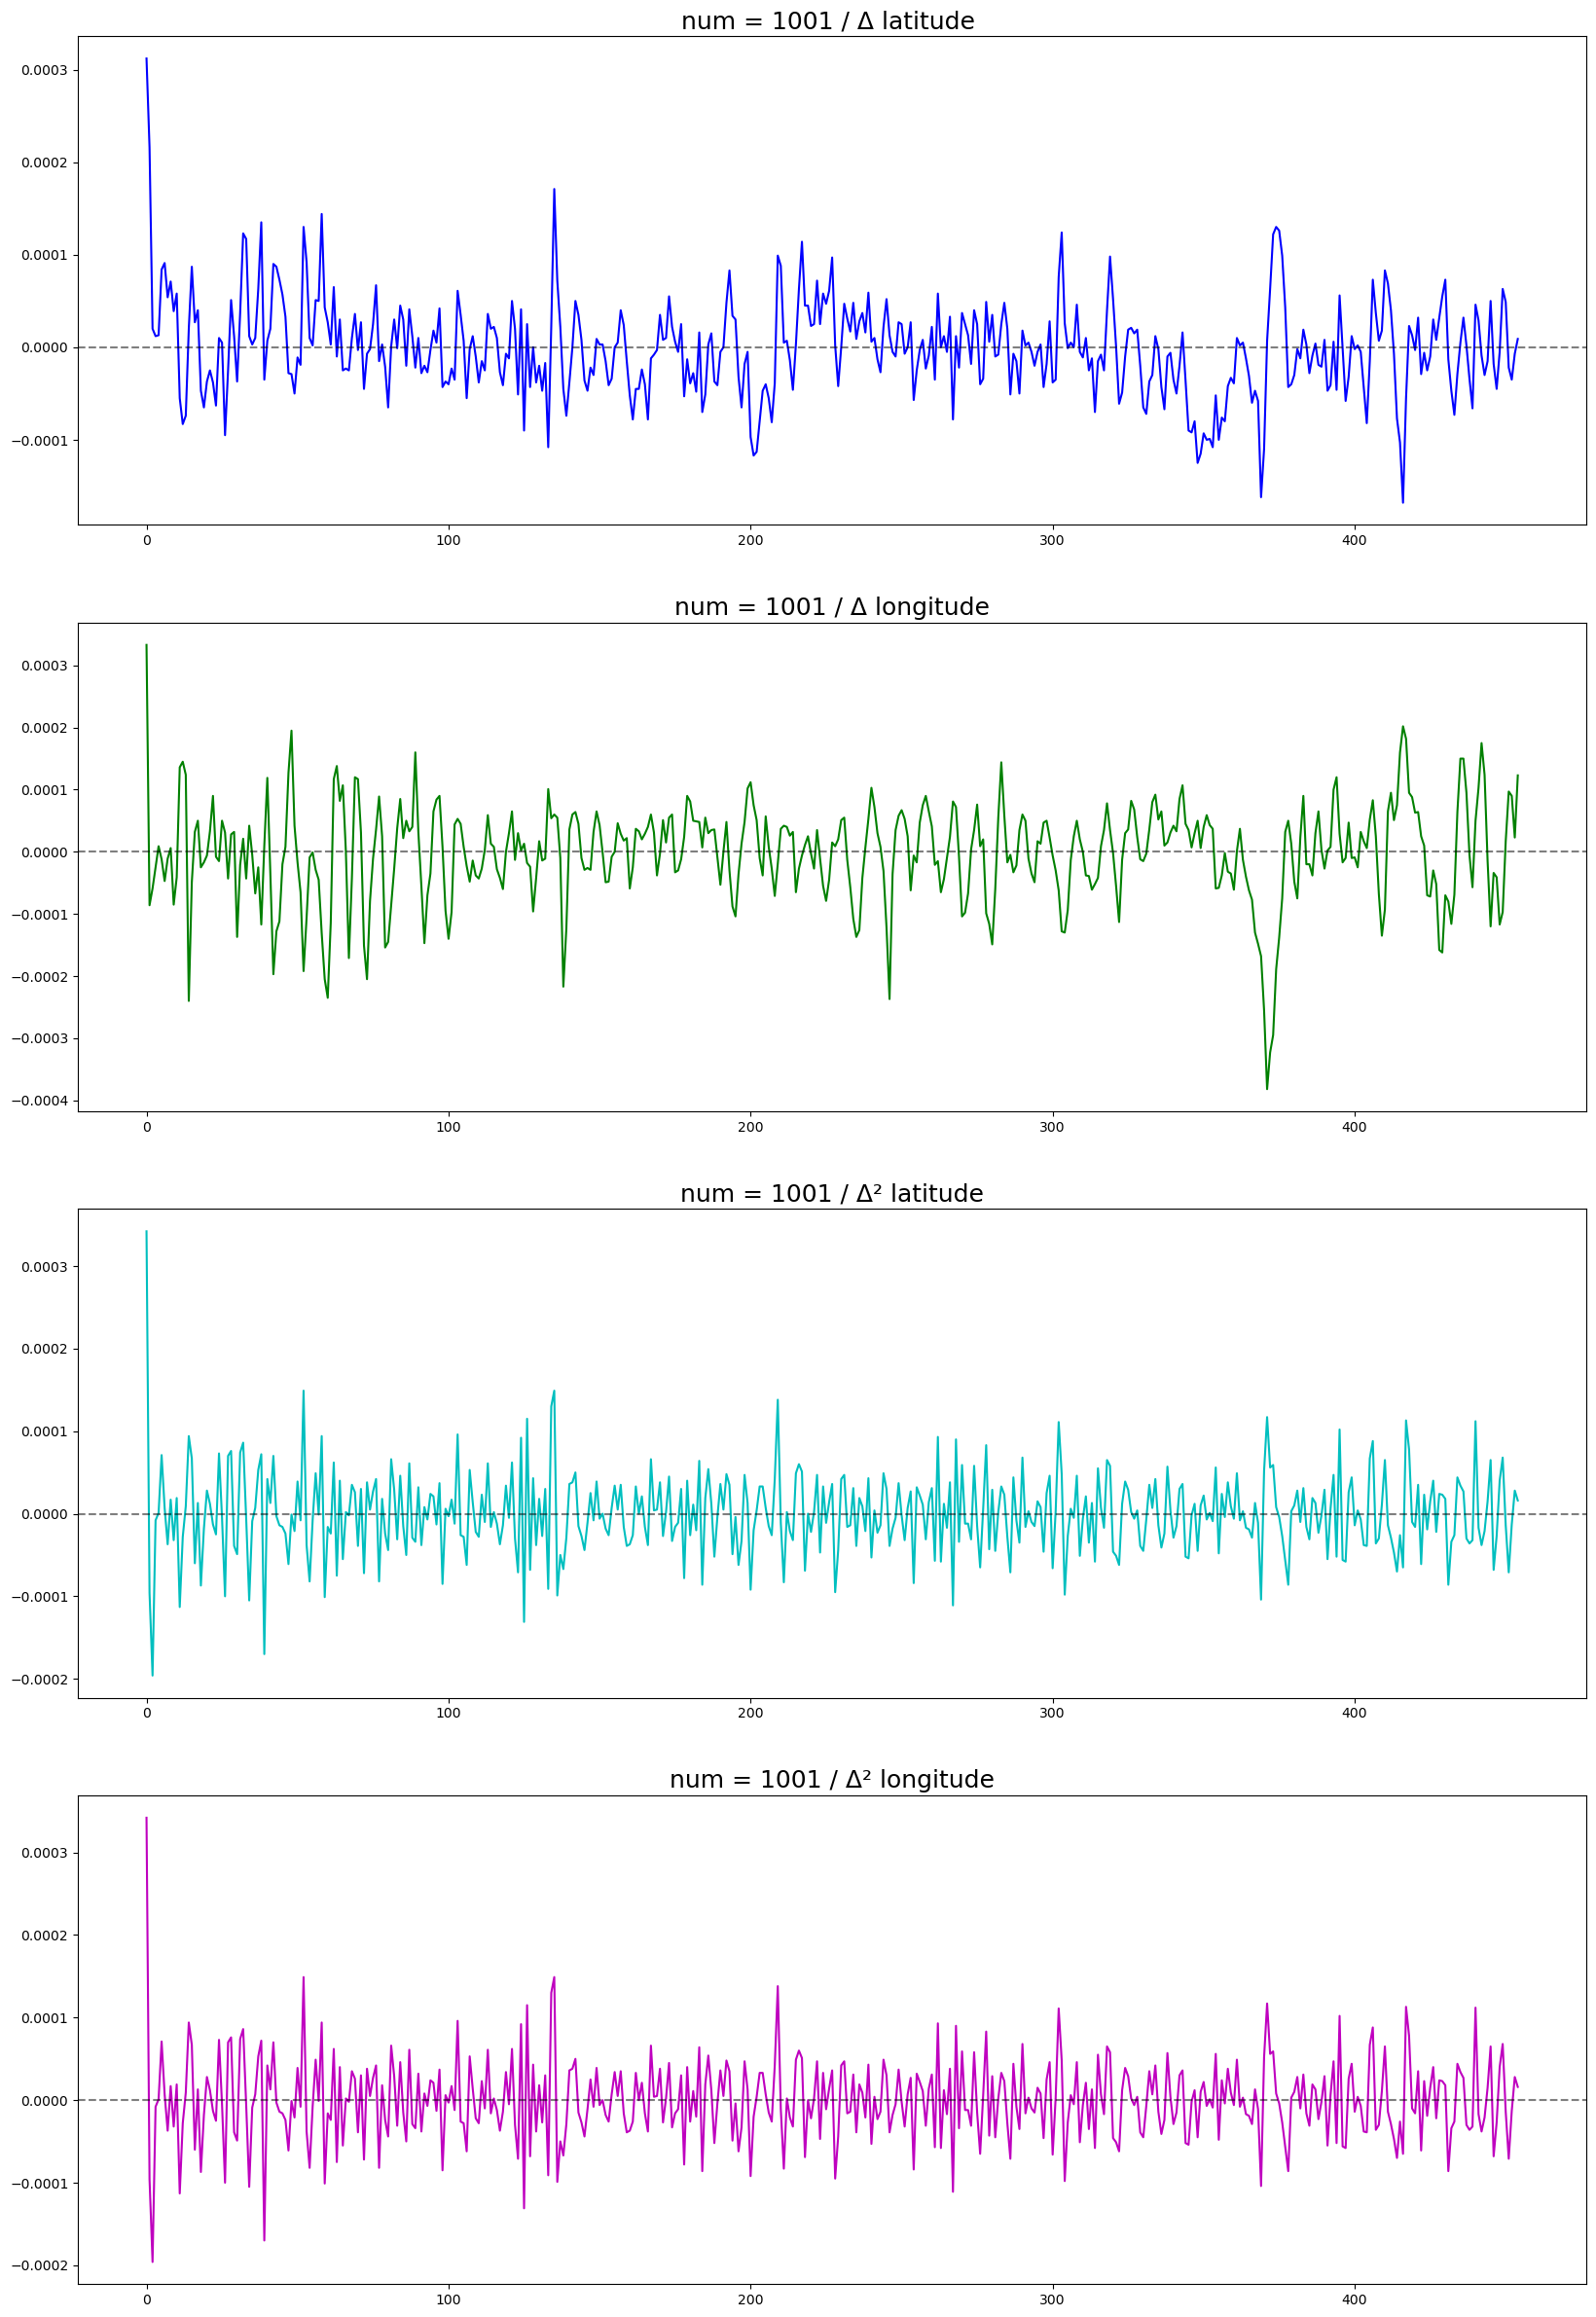

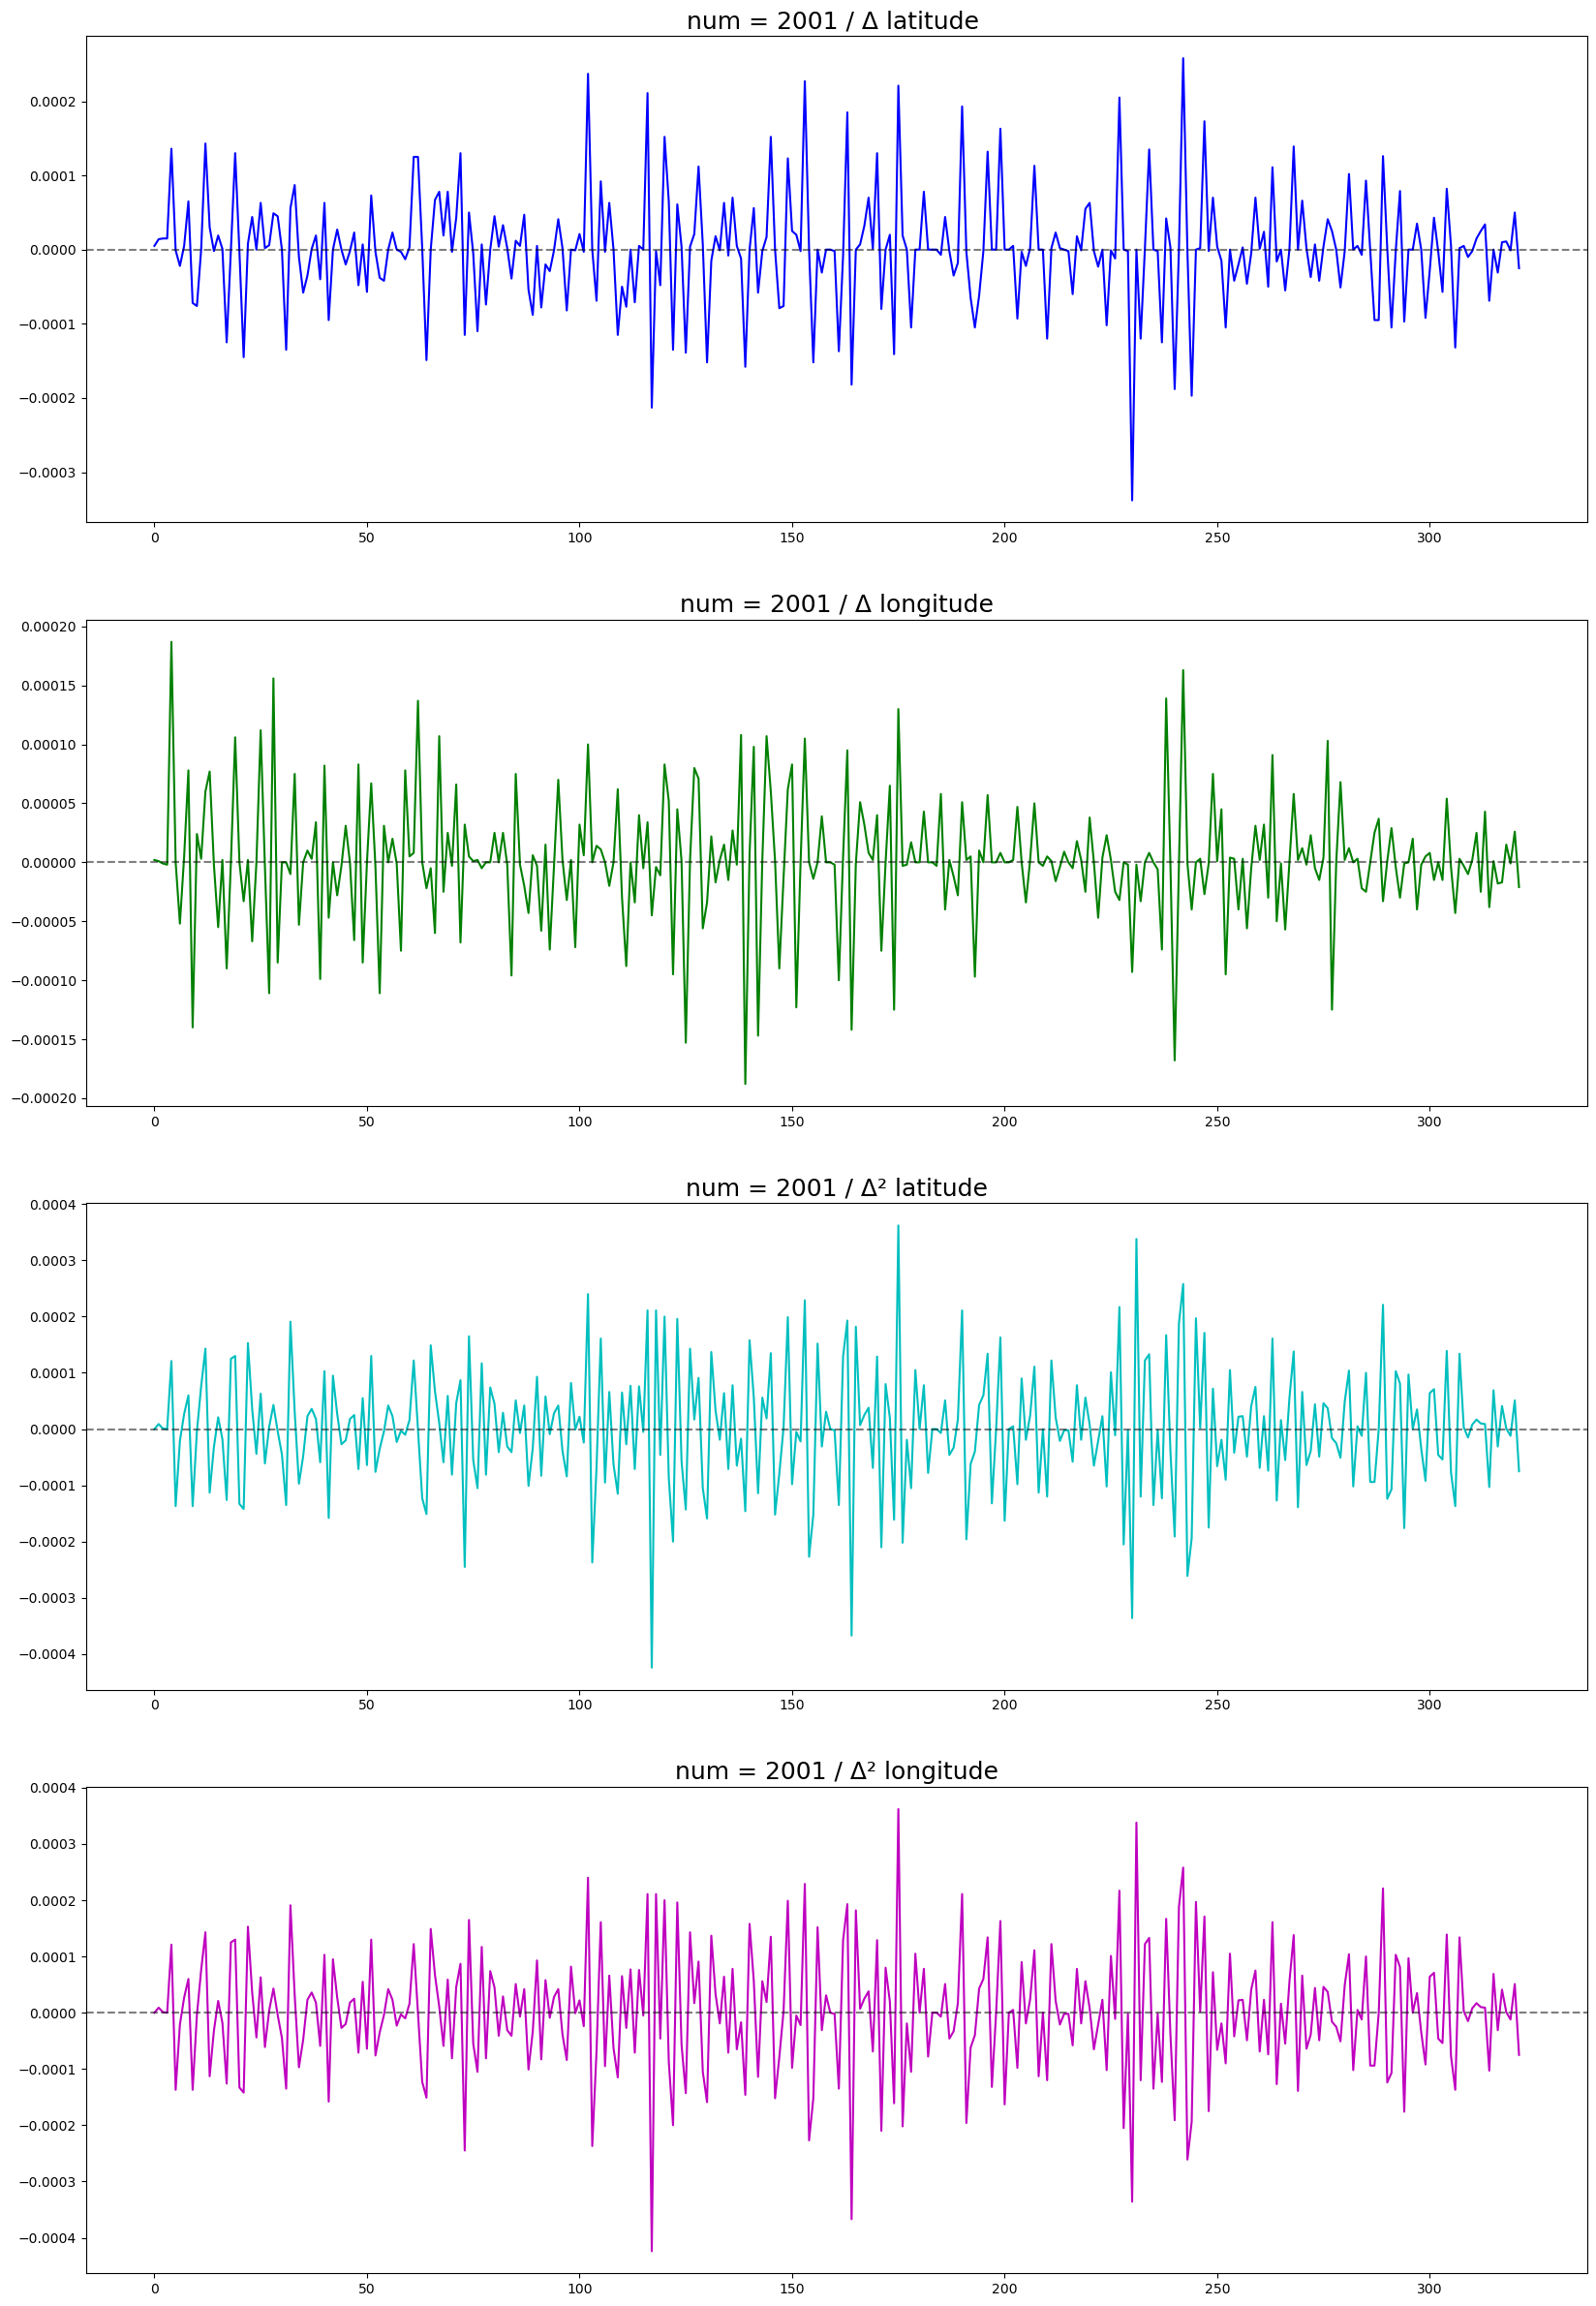

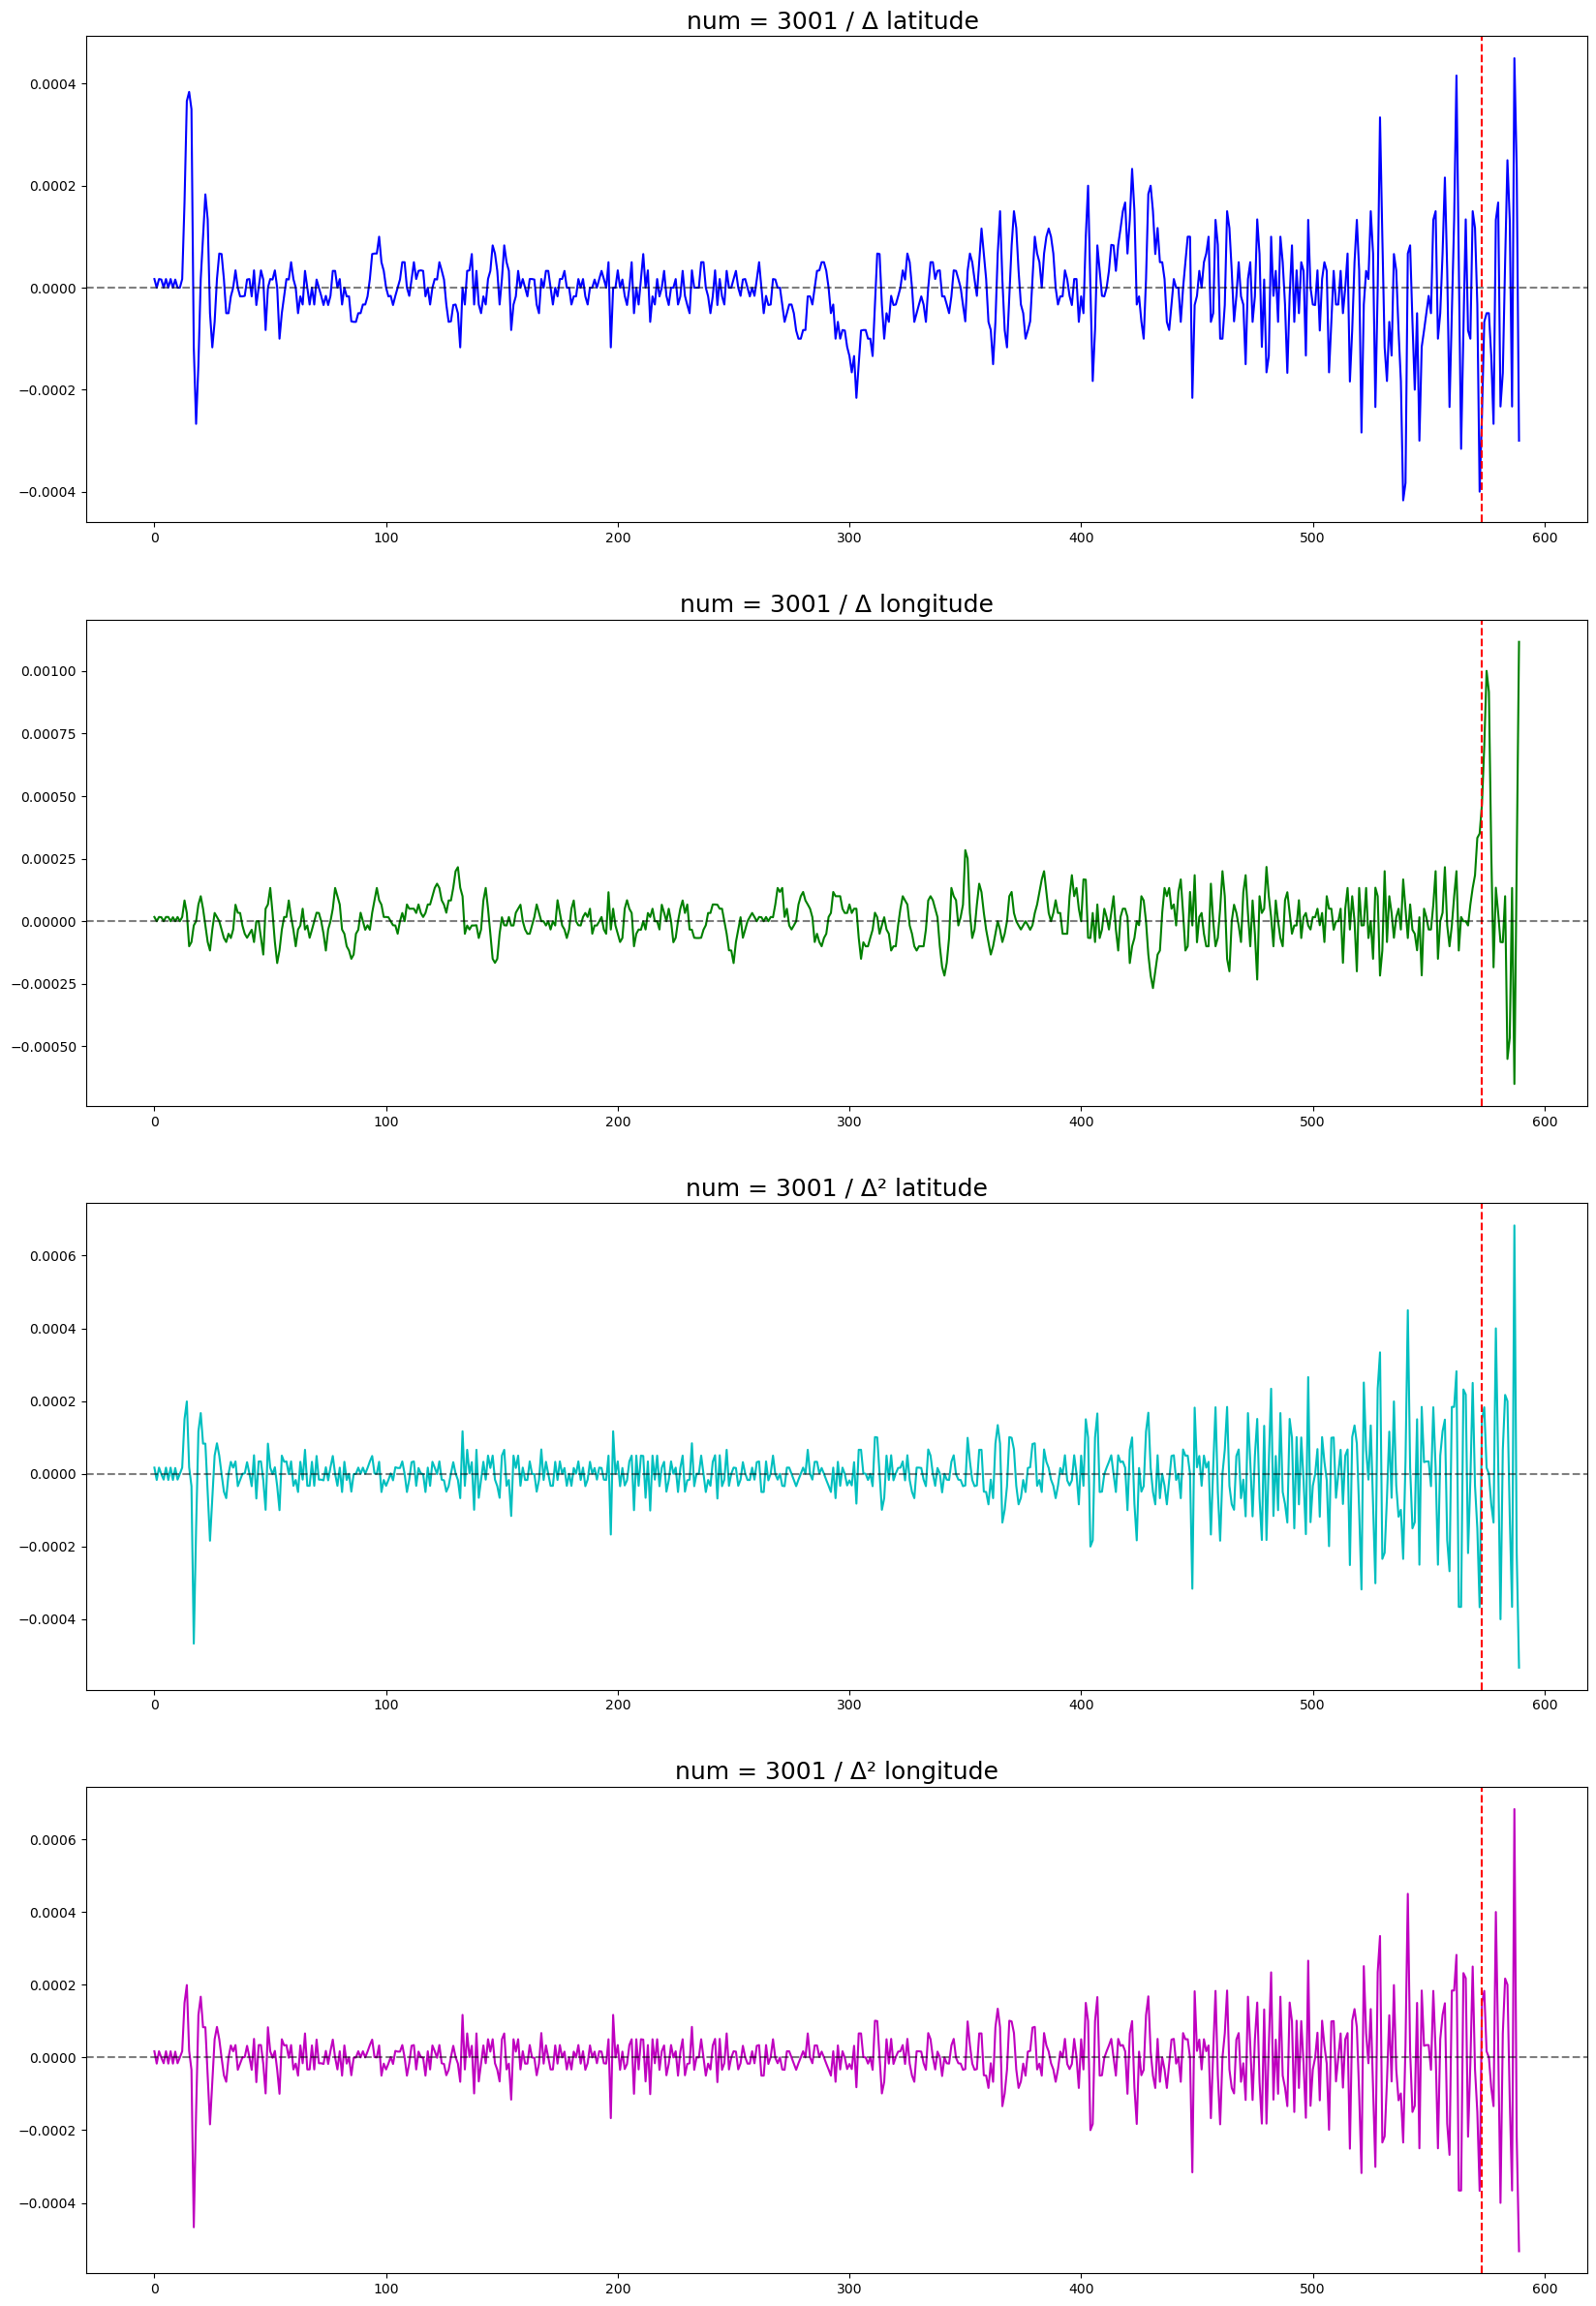

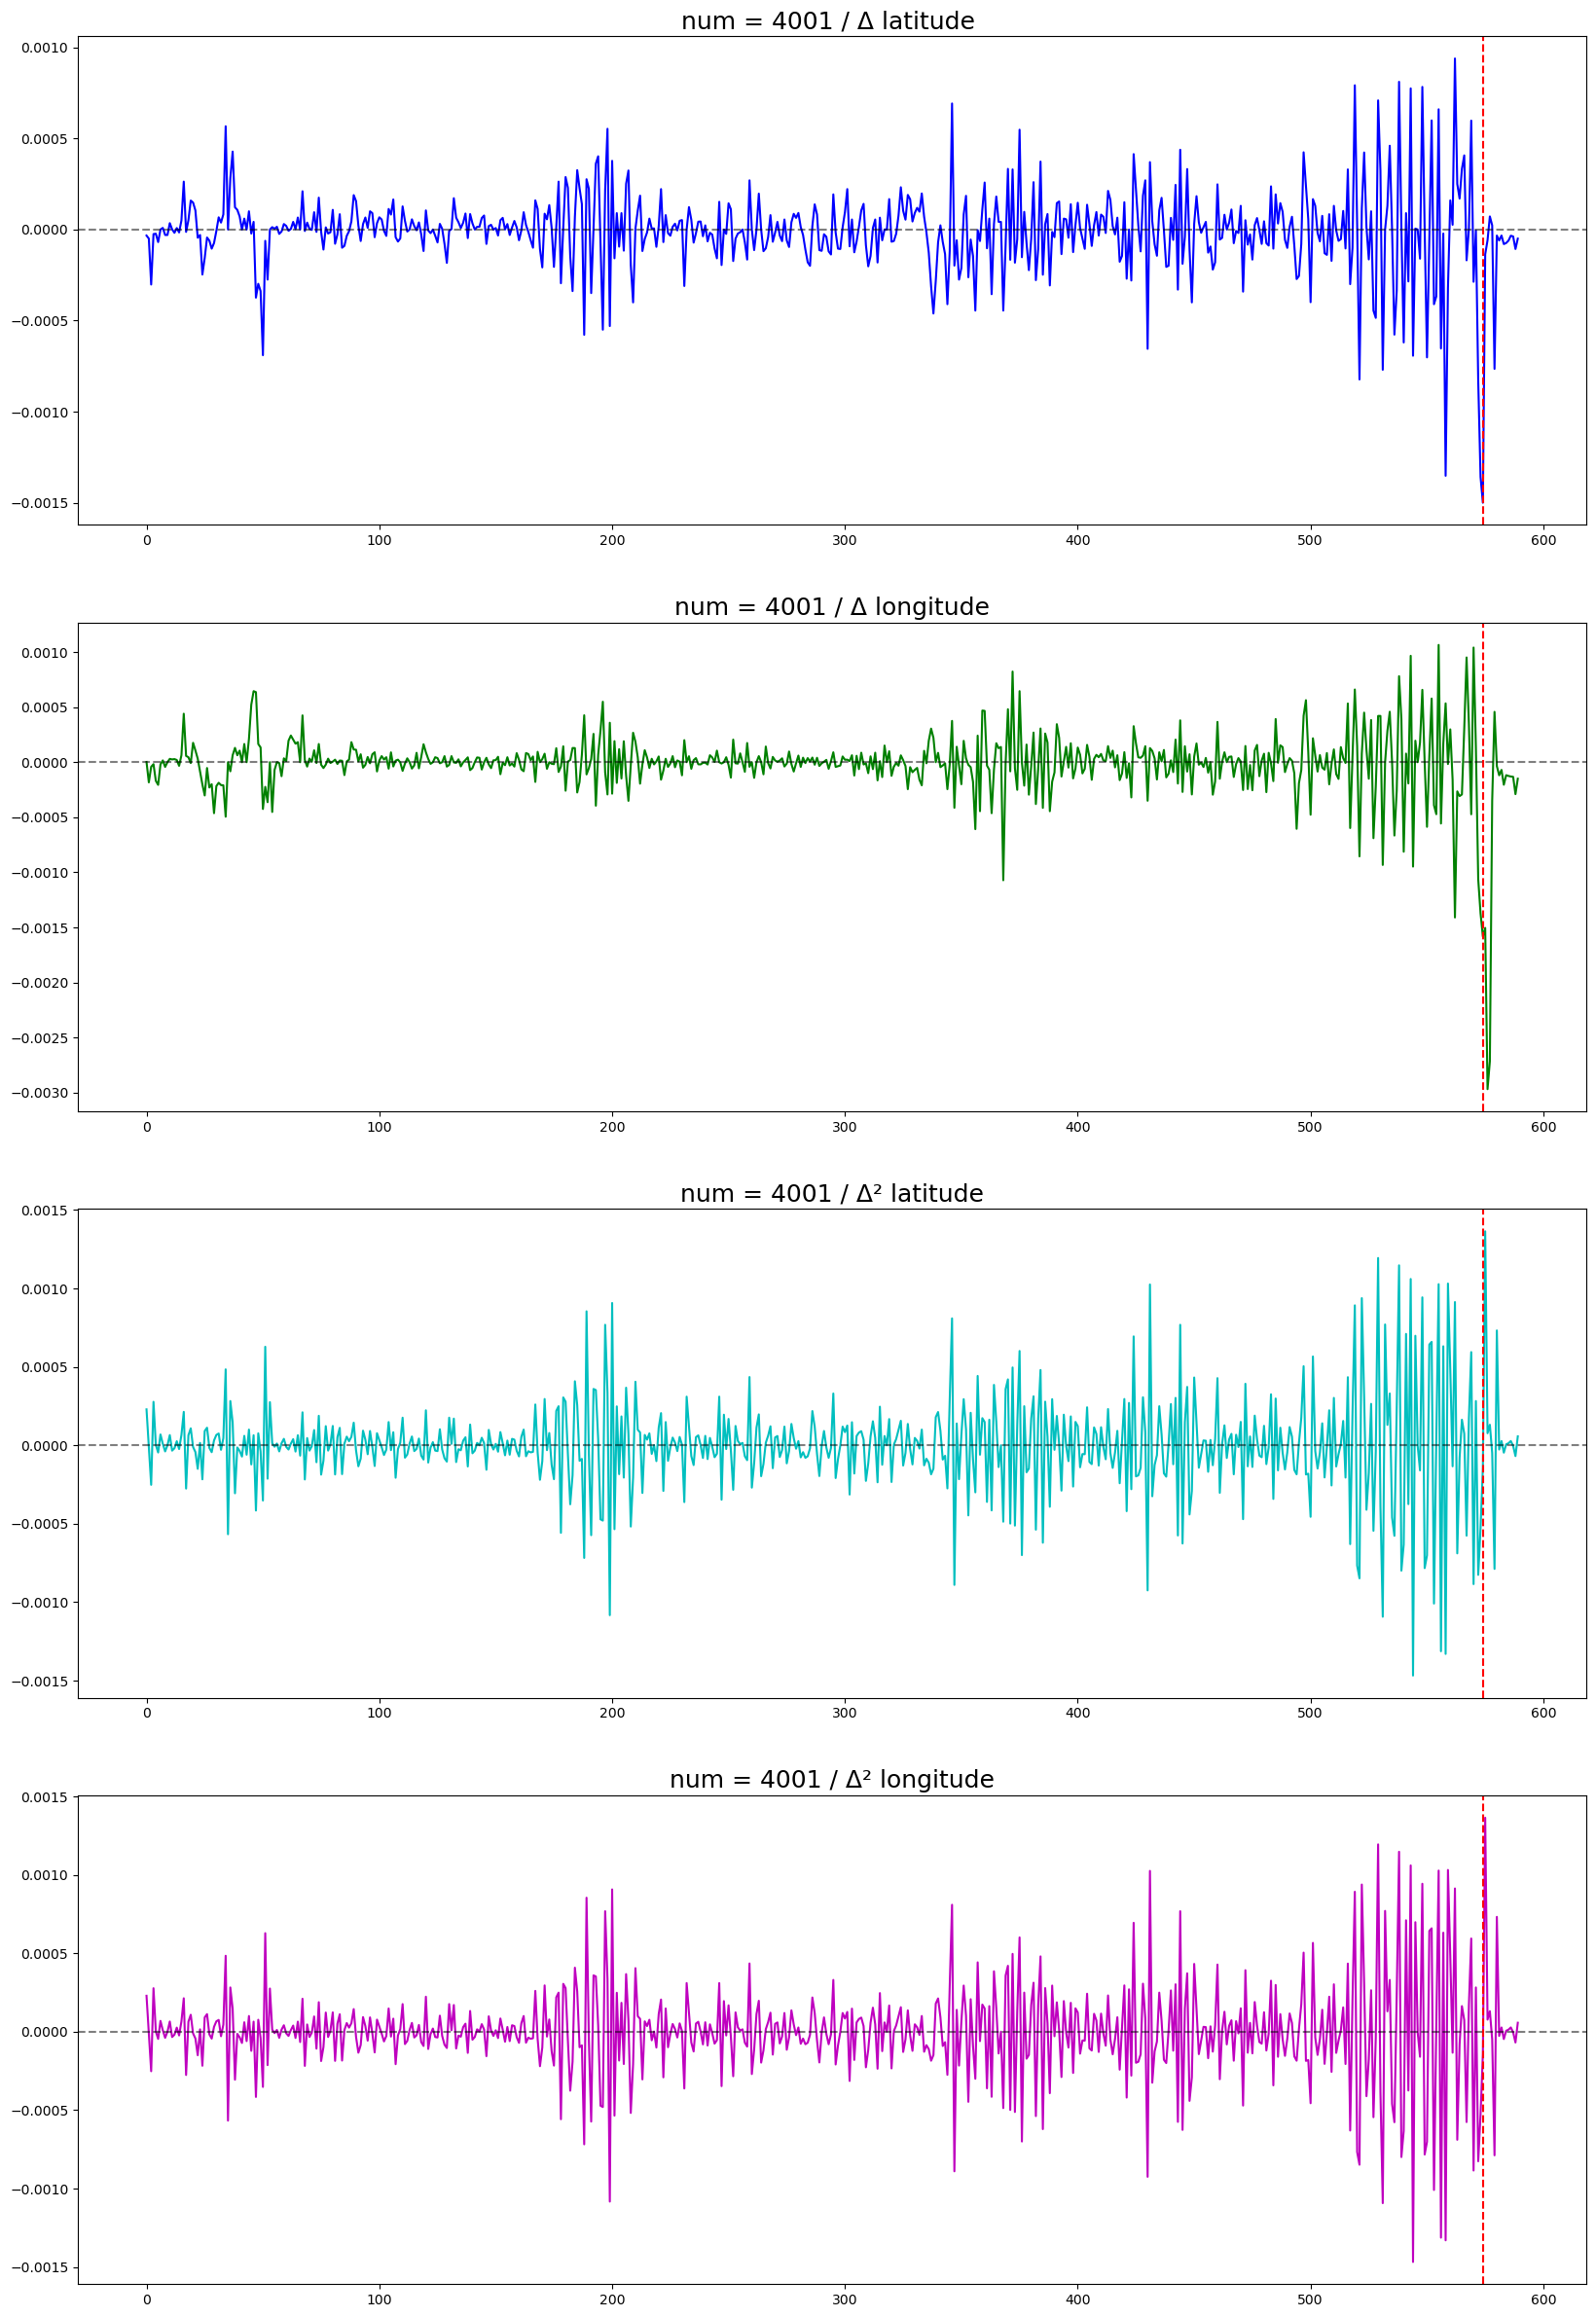

In [7]:
for num in num_list:
    df1 = df[df['num']==num]
    df1 = df1.reset_index(drop=True)
    
    if len(df1[df1['anchor_drag']==1].index.tolist()) != 0:
        x=min(df1[df1['anchor_drag']==1].index.tolist())
    else:
        x = np.nan
    

    plt.figure(figsize = (20,30))
    plt.subplot(4,1,1)
    plt.plot(range(len(df1)), df1['d_lati'], color = 'b')
    plt.axvline(x,color='red', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.title(f'num = {num} / Δ latitude ', fontsize = 18)
    
    plt.subplot(4,1,2)
    plt.plot(range(len(df1)), df1['d_long'], color = 'g')
    plt.axvline(x,color='red', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.title(f'num = {num} / Δ longitude', fontsize = 18)

    
    plt.subplot(4,1,3)
    plt.plot(range(len(df1)), df1['d_d_lati'], color = 'c')
    plt.axvline(x,color='red', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.title(f'num = {num} / Δ² latitude',fontsize = 18)
    
    plt.subplot(4,1,4)
    plt.plot(range(len(df1)), df1['d_d_long'], color = 'm')
    plt.axvline(x,color='red', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    plt.title(f'num = {num} / Δ² longitude',fontsize = 18)
    
    plt.show()